# Exercice 3 : Respect du Budget

## A - Quelles sont les dépenses de ACME ? Comment se comparent elles au bugdet au mois le mois ?
et
## B - Quelle la structure de dépenses ? Qui dépense combien ? En avance, en retard ? 

In [1]:
import pandas as pd
import numpy as np

In [2]:
ACME = {'Budget Annuel':[100,56,24,12,8],'Dépenses à date':[70.9,49,10,7,4.9], 'janv':[10,8,2,0,0],'févr':[11.5,7,2,1,1.5],'mars':[9.5,6,2,1,0.5],
       'avr':[10,7,1,1,1],'mai':[11.7,8,1,2,0.7],'juin':[9.2,7,1,1,0.2],'juil':[9,6,1,1,1]}
df = pd.DataFrame(ACME, columns=['Budget Annuel','Dépenses à date','janv','févr','mars','avr','mai','juin','juil'])
df.set_index([['Total','Commerce','R&D','Support','IT']],inplace=True)
df




,Budget Annuel,Dépenses à date,janv,févr,mars,avr,mai,juin,juil
Total,100,70.9,10,11.5,9.5,10,11.7,9.2,9
Commerce,56,49.0,8,7.0,6.0,7,8.0,7.0,6
R&D,24,10.0,2,2.0,2.0,1,1.0,1.0,1
Support,12,7.0,0,1.0,1.0,1,2.0,1.0,1
IT,8,4.9,0,1.5,0.5,1,0.7,0.2,1


In [3]:
#checking
df[['janv','févr','mars','avr','mai','juin','juil']].sum(axis=1)

Total       70.9
Commerce    49.0
R&D         10.0
Support      7.0
IT           4.9
dtype: float64

In [4]:
import matplotlib.pyplot as plt

In [5]:
dfT = df[['janv','févr','mars','avr','mai','juin','juil']].transpose()
dfT

,Total,Commerce,R&D,Support,IT
janv,10.0,8.0,2.0,0.0,0.0
févr,11.5,7.0,2.0,1.0,1.5
mars,9.5,6.0,2.0,1.0,0.5
avr,10.0,7.0,1.0,1.0,1.0
mai,11.7,8.0,1.0,2.0,0.7
juin,9.2,7.0,1.0,1.0,0.2
juil,9.0,6.0,1.0,1.0,1.0


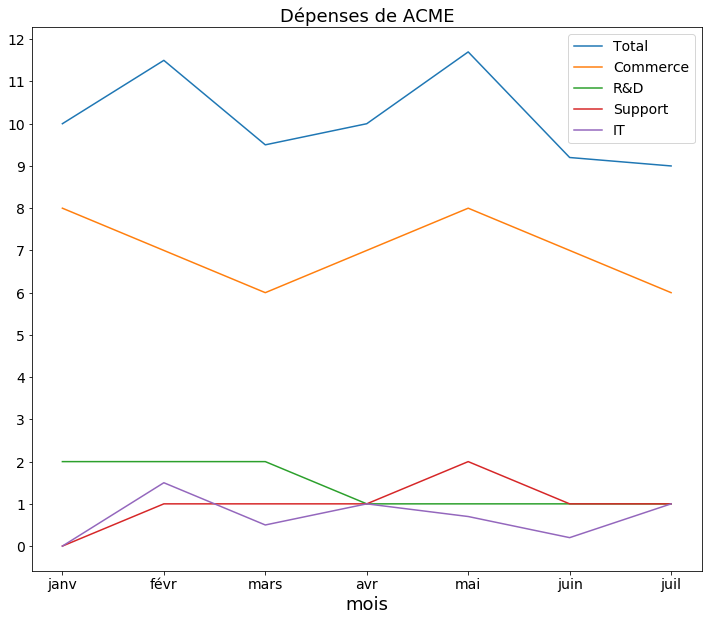

In [6]:
dfT[['Total','Commerce','R&D','Support','IT']].plot(figsize=(12, 10))
plt.title('Dépenses de ACME',fontsize=18)

labels = ['janv','févr','mars','avr','mai','juin','juil']#,'août','sept','oct','nov','déc']
plt.xticks(np.arange(7),labels,fontsize=14)
plt.yticks(np.arange(13),fontsize=14)

plt.ylabel('')
plt.xlabel('mois',fontsize=18)
plt.legend(loc=1,fontsize=14)

plt.savefig('Dépenses de ACME.jpg', dpi=300)

plt.show()

In [7]:
df

,Budget Annuel,Dépenses à date,janv,févr,mars,avr,mai,juin,juil
Total,100,70.9,10,11.5,9.5,10,11.7,9.2,9
Commerce,56,49.0,8,7.0,6.0,7,8.0,7.0,6
R&D,24,10.0,2,2.0,2.0,1,1.0,1.0,1
Support,12,7.0,0,1.0,1.0,1,2.0,1.0,1
IT,8,4.9,0,1.5,0.5,1,0.7,0.2,1


In [8]:
df['Budget/mois']=df['Budget Annuel']/12
df

,Budget Annuel,Dépenses à date,janv,févr,mars,avr,mai,juin,juil,Budget/mois
Total,100,70.9,10,11.5,9.5,10,11.7,9.2,9,8.333333
Commerce,56,49.0,8,7.0,6.0,7,8.0,7.0,6,4.666667
R&D,24,10.0,2,2.0,2.0,1,1.0,1.0,1,2.000000
Support,12,7.0,0,1.0,1.0,1,2.0,1.0,1,1.000000
IT,8,4.9,0,1.5,0.5,1,0.7,0.2,1,0.666667


In [9]:
diff = df.iloc[:, 2:9].apply(lambda x: (1/12)*df['Budget Annuel']-x,axis=0)
diff

,janv,févr,mars,avr,mai,juin,juil
Total,-1.666667,-3.166667,-1.166667,-1.666667,-3.366667,-0.866667,-0.666667
Commerce,-3.333333,-2.333333,-1.333333,-2.333333,-3.333333,-2.333333,-1.333333
R&D,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
Support,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
IT,0.666667,-0.833333,0.166667,-0.333333,-0.033333,0.466667,-0.333333


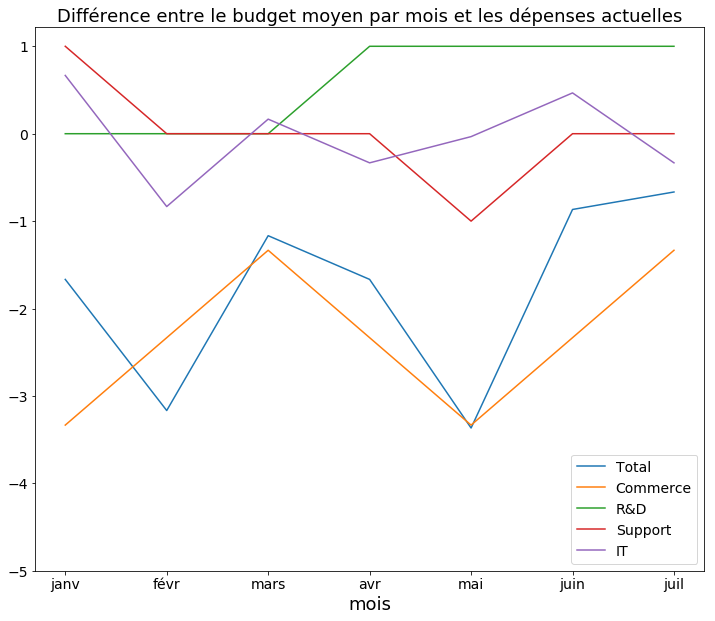

In [10]:
diffT = diff.transpose()
diffT[['Total','Commerce','R&D','Support','IT']].plot(figsize=(12, 10))
plt.title('Différence entre le budget moyen par mois et les dépenses actuelles',fontsize=18)

labels = ['janv','févr','mars','avr','mai','juin','juil']#,'août','sept','oct','nov','déc']
plt.xticks(np.arange(7),labels,fontsize=14)
plt.yticks(np.arange(-5,2,1),fontsize=14)

plt.ylabel('')
plt.xlabel('mois',fontsize=18)
plt.legend(loc=4,fontsize=14)

plt.savefig('Dépenses de ACME différence.jpg', dpi=300)

plt.show()

In [11]:
diffT.describe()

,Total,Commerce,R&D,Support,IT
count,7.000000,7.000000,7.000000,7.00000,7.000000
mean,-1.795238,-2.333333,0.571429,0.00000,-0.033333
std,1.073490,0.816497,0.534522,0.57735,0.516398
min,-3.366667,-3.333333,0.000000,-1.00000,-0.833333
25%,-2.416667,-2.833333,0.000000,0.00000,-0.333333
50%,-1.666667,-2.333333,1.000000,0.00000,-0.033333
75%,-1.016667,-1.833333,1.000000,0.00000,0.316667
max,-0.666667,-1.333333,1.000000,1.00000,0.666667


In [12]:
diffT

,Total,Commerce,R&D,Support,IT
janv,-1.666667,-3.333333,0.0,1.0,0.666667
févr,-3.166667,-2.333333,0.0,0.0,-0.833333
mars,-1.166667,-1.333333,0.0,0.0,0.166667
avr,-1.666667,-2.333333,1.0,0.0,-0.333333
mai,-3.366667,-3.333333,1.0,-1.0,-0.033333
juin,-0.866667,-2.333333,1.0,0.0,0.466667
juil,-0.666667,-1.333333,1.0,0.0,-0.333333


## C - Quelles prévisions peut on faire à fin d'année ? 

In [13]:
# Dépenses moyennes mensuelles
comm_mean_mois = dfT['Commerce'].mean()
rd_mean_mois   = dfT['R&D'].mean()
sup_mean_mois  = dfT['Support'].mean()
it_mean_mois   = dfT['IT'].mean()

# Dépenses annuelles (prévision)
comm_an = 12*dfT['Commerce'].mean()
rd_an = 12*dfT['R&D'].mean()
sup_an = 12*dfT['Support'].mean()
it_an = 12*dfT['IT'].mean()

 
comm_fin = df['Budget Annuel'][1]-comm_an
rd_fin   = df['Budget Annuel'][2]-rd_an
sup_fin  = df['Budget Annuel'][3]-sup_an
it_fin   = df['Budget Annuel'][4]-it_an

print('Commerce, dépenses moyennes mensuelles :','{:.2f}'.format(comm_mean_mois),', prévision fin d\'année:','{:.2f}'.format(comm_fin))
print('R&D,      dépenses moyennes mensuelles :','{:.2f}'.format(rd_mean_mois),', prévision fin d\'année:','{:.2f}'.format(rd_fin))
print('Support,  dépenses moyennes mensuelles :','{:.2f}'.format(sup_mean_mois),', prévision fin d\'année:','{:.2f}'.format(sup_fin))
print('IT,       dépenses moyennes mensuelles :','{:.2f}'.format(it_mean_mois),', prévision fin d\'année:','{:.2f}'.format(it_fin))


Commerce, dépenses moyennes mensuelles : 7.00 , prévision fin d'année: -28.00
R&D,      dépenses moyennes mensuelles : 1.43 , prévision fin d'année: 6.86
Support,  dépenses moyennes mensuelles : 1.00 , prévision fin d'année: 0.00
IT,       dépenses moyennes mensuelles : 0.70 , prévision fin d'année: -0.40


In [14]:
df

,Budget Annuel,Dépenses à date,janv,févr,mars,avr,mai,juin,juil,Budget/mois
Total,100,70.9,10,11.5,9.5,10,11.7,9.2,9,8.333333
Commerce,56,49.0,8,7.0,6.0,7,8.0,7.0,6,4.666667
R&D,24,10.0,2,2.0,2.0,1,1.0,1.0,1,2.000000
Support,12,7.0,0,1.0,1.0,1,2.0,1.0,1,1.000000
IT,8,4.9,0,1.5,0.5,1,0.7,0.2,1,0.666667


In [19]:
col1 = [comm_mean_mois+rd_mean_mois+sup_mean_mois+it_mean_mois,comm_mean_mois,rd_mean_mois,sup_mean_mois,it_mean_mois]
df['Dépenses/mois'] = col1
df

,Budget Annuel,Dépenses à date,janv,févr,mars,avr,mai,juin,juil,Budget/mois,Dépenses/mois
Total,100,70.9,10,11.5,9.5,10,11.7,9.2,9,8.333333,10.128571
Commerce,56,49.0,8,7.0,6.0,7,8.0,7.0,6,4.666667,7.000000
R&D,24,10.0,2,2.0,2.0,1,1.0,1.0,1,2.000000,1.428571
Support,12,7.0,0,1.0,1.0,1,2.0,1.0,1,1.000000,1.000000
IT,8,4.9,0,1.5,0.5,1,0.7,0.2,1,0.666667,0.700000


In [20]:
col2 = [comm_fin+rd_fin+sup_fin+it_fin,comm_fin,rd_fin,sup_fin,it_fin]
df['Prévision fin d\'année'] = col2
df

,Budget Annuel,Dépenses à date,janv,févr,mars,avr,mai,juin,juil,Budget/mois,Dépenses/mois,Prévision fin d'année
Total,100,70.9,10,11.5,9.5,10,11.7,9.2,9,8.333333,10.128571,-21.542857
Commerce,56,49.0,8,7.0,6.0,7,8.0,7.0,6,4.666667,7.000000,-28.000000
R&D,24,10.0,2,2.0,2.0,1,1.0,1.0,1,2.000000,1.428571,6.857143
Support,12,7.0,0,1.0,1.0,1,2.0,1.0,1,1.000000,1.000000,0.000000
IT,8,4.9,0,1.5,0.5,1,0.7,0.2,1,0.666667,0.700000,-0.400000


In [21]:
print(df)

          Budget Annuel  Dépenses à date  janv  févr  mars  avr   mai  juin  \
Total               100             70.9    10  11.5   9.5   10  11.7   9.2   
Commerce             56             49.0     8   7.0   6.0    7   8.0   7.0   
R&D                  24             10.0     2   2.0   2.0    1   1.0   1.0   
Support              12              7.0     0   1.0   1.0    1   2.0   1.0   
IT                    8              4.9     0   1.5   0.5    1   0.7   0.2   

          juil  Budget/mois  Dépenses/mois  Prévision fin d'année  
Total        9     8.333333      10.128571             -21.542857  
Commerce     6     4.666667       7.000000             -28.000000  
R&D          1     2.000000       1.428571               6.857143  
Support      1     1.000000       1.000000               0.000000  
IT           1     0.666667       0.700000              -0.400000  


In [22]:
df[['Budget/mois','Dépenses/mois','Prévision fin d\'année']]

,Budget/mois,Dépenses/mois,Prévision fin d'année
Total,8.333333,10.128571,-21.542857
Commerce,4.666667,7.000000,-28.000000
R&D,2.000000,1.428571,6.857143
Support,1.000000,1.000000,0.000000
IT,0.666667,0.700000,-0.400000
